# Main

In [1]:
from graph import *
from walk import *
import numpy as np
import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## PageRank without count means: 
* `r_0 = [1 / nodes for i in range(nodes)]`
* `r[focus] += previous_r[i] / len(G[i])` for all in-nodes `i`

## PageRank with count means: 
* `r_0 = [0 for i in range(nodes)]`
* `r[focus] += 1`

## PageRank with teleport probability function:
$$\frac{1}{(1 + x*0.5)}$$
where x is the number of steps taken from the last time the walker was in the current position.

PageRank attempt #1


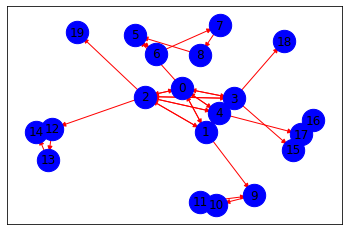

Mean square error between NetworkX PageRank & random walk: 0.0003494353526587496

Mean square error between NetworkX PageRank & random walk with count: 0.0007879461687460664



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
RW pagerank,0.039718,0.031309,0.020333,0.023765,0.028046,0.037147,0.048878,0.060608,0.084070,0.112614,0.049269,0.072730,0.076249,0.037147,0.048878,0.070536,0.109689,0.019686,0.013686,0.015641
RW pagerank with count,0.068966,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.068966,0.068966,0.034483,0.068966,0.068966,0.034483,0.034483,0.068966,0.068966,0.068966,0.034483,0.068966
NX pagerank,0.028616,0.024458,0.025065,0.025065,0.024458,0.069443,0.068172,0.067091,0.066172,0.071737,0.070122,0.068749,0.070164,0.068785,0.067613,0.073758,0.071840,0.013302,0.012695,0.012695


In [11]:
print('PageRank attempt #1')
G = graph()
eigen_vector = nx.pagerank(G)


r, history, r_c, history_c = walk(G, 'not_tanh')


norm_r = [float(i)/sum(r[:-1]) for i in r[:-1]]
norm_r_c = [float(i)/sum(r_c[:-1]) for i in r_c[:-1]]
nx_pagerank = [i for i in eigen_vector.values()]

mse = (np.square(np.array(norm_r) - np.array(nx_pagerank))).mean()
mse_c = (np.square(np.array(norm_r_c) - np.array(nx_pagerank))).mean()

print(f'Mean square error between NetworkX PageRank & random walk: {mse}\n')
print(f'Mean square error between NetworkX PageRank & random walk with count: {mse_c}\n')

pd.DataFrame([norm_r, norm_r_c, nx_pagerank], index=['RW pagerank', 'RW pagerank with count','NX pagerank' ])

In [3]:
print('PageRank history:')
pd.DataFrame(history)

PageRank history:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,
1,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.100000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,
2,0.050000,0.050000,0.050000,0.050000,0.050000,0.158333,0.050000,0.050000,0.100000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,
3,0.050000,0.050000,0.050000,0.050000,0.050000,0.158333,0.208333,0.050000,0.100000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,
4,0.050000,0.050000,0.050000,0.050000,0.050000,0.158333,0.208333,0.258333,0.100000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,
5,0.050000,0.050000,0.050000,0.050000,0.050000,0.158333,0.208333,0.258333,0.358333,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,teleport
6,0.050000,0.050000,0.050000,0.050000,0.050000,0.158333,0.208333,0.258333,0.358333,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.058333,dead end
7,0.050000,0.050000,0.050000,0.086667,0.050000,0.158333,0.208333,0.258333,0.358333,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.058333,
8,0.050000,0.091111,0.050000,0.086667,0.050000,0.158333,0.208333,0.258333,0.358333,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.058333,
9,0.050000,0.091111,0.050000,0.086667,0.099333,0.158333,0.208333,0.258333,0.358333,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.058333,


In [4]:
print('PageRank with count history:')
pd.DataFrame(history_c)

PageRank with count history:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,
2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,
3,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,
4,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,
5,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,teleport
6,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,1,dead end
7,0,0,0,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,1,
8,0,1,0,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,1,
9,0,1,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,1,


## PageRank with teleport probability function:
$$tanh(0.5x + 0.5)$$
where x is the number of steps taken from the last time the walker was in the current position.

PageRank attempt #2


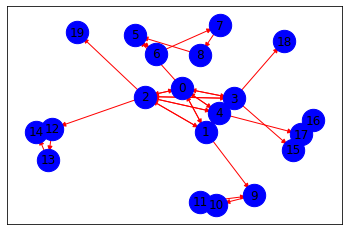

Mean square error between NetworkX PageRank & random walk: 0.0029409831369046767

Mean square error between NetworkX PageRank & random walk with count: 0.0010209780006578792



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
RW pagerank,0.022158,0.013782,0.029332,0.015233,0.028147,0.040788,0.058009,0.039881,0.028098,0.041913,0.121313,0.016315,0.108767,0.274637,0.090639,0.031905,0.017886,0.008508,0.006345,0.006345
RW pagerank with count,0.023810,0.023810,0.071429,0.047619,0.071429,0.047619,0.047619,0.047619,0.023810,0.047619,0.119048,0.023810,0.047619,0.119048,0.071429,0.047619,0.023810,0.047619,0.023810,0.023810
NX pagerank,0.028616,0.024458,0.025065,0.025065,0.024458,0.069443,0.068172,0.067091,0.066172,0.071737,0.070122,0.068749,0.070164,0.068785,0.067613,0.073758,0.071840,0.013302,0.012695,0.012695


In [12]:
print('PageRank attempt #2')
G = graph()
eigen_vector = nx.pagerank(G)

# print(sorted(eigen_vector, key=eigen_vector.get, ))
# print(sorted(round(x,2) for x in eigen_vector.values()))


r, history, r_c, history_c = walk(G, 'tanh')

norm_r = [float(i)/sum(r[:-1]) for i in r[:-1]]
norm_r_c = [float(i)/sum(r_c[:-1]) for i in r_c[:-1]]
nx_pagerank = [i for i in eigen_vector.values()]

mse = (np.square(np.array(norm_r) - np.array(nx_pagerank))).mean()
mse_c = (np.square(np.array(norm_r_c) - np.array(nx_pagerank))).mean()

print(f'Mean square error between NetworkX PageRank & random walk: {mse}\n')
print(f'Mean square error between NetworkX PageRank & random walk with count: {mse_c}\n')

pd.DataFrame([norm_r, norm_r_c, nx_pagerank], index=['RW pagerank', 'RW pagerank with count','NX pagerank' ])

In [13]:
print('PageRank history:')
pd.DataFrame(history)

PageRank history:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,
1,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.100000,0.050000,0.050000,0.050000,0.050000,0.050000,
2,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.158333,0.050000,0.100000,0.050000,0.050000,0.050000,0.050000,0.050000,
3,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.158333,0.208333,0.100000,0.050000,0.050000,0.050000,0.050000,0.050000,
4,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.158333,0.208333,0.308333,0.050000,0.050000,0.050000,0.050000,0.050000,teleport
5,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.158333,0.366667,0.308333,0.050000,0.050000,0.050000,0.050000,0.050000,teleport
6,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.158333,0.525000,0.308333,0.050000,0.050000,0.050000,0.050000,0.050000,
7,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.158333,0.525000,0.833333,0.050000,0.050000,0.050000,0.050000,0.050000,
8,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,1.000000,0.525000,0.833333,0.050000,0.050000,0.050000,0.050000,0.050000,
9,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,1.000000,1.525000,0.833333,0.050000,0.050000,0.050000,0.050000,0.050000,teleport


In [14]:
print('PageRank with count history:')
pd.DataFrame(history_c)

PageRank with count history:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,
3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,teleport
5,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,0,0,teleport
6,0,0,0,0,0,0,0,0,0,0,0,0,1,3,2,0,0,0,0,0,
7,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,
8,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,0,0,0,0,0,
9,0,0,0,0,0,0,0,0,0,0,0,0,2,4,3,0,0,0,0,0,teleport


## PageRank with teleport probability function:
`If the previous node from the current position == the previous from the last time the walker was in the same current position:
    do_teleport()`

PageRank attempt #3


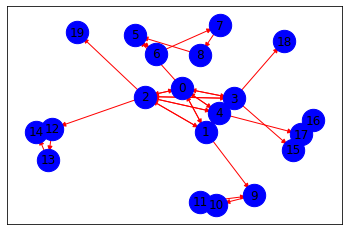

Mean square error between NetworkX PageRank & random walk: 0.0012273778037402328

Mean square error between NetworkX PageRank & random walk with count: 0.0014151179644840406



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
RW pagerank,0.058218,0.014282,0.061344,0.050070,0.055000,0.032657,0.040495,0.056171,0.079684,0.075242,0.032919,0.048594,0.092341,0.171938,0.033615,0.024021,0.031858,0.009405,0.022043,0.010102
RW pagerank with count,0.054054,0.027027,0.108108,0.081081,0.081081,0.027027,0.027027,0.054054,0.054054,0.054054,0.027027,0.054054,0.081081,0.081081,0.027027,0.027027,0.027027,0.027027,0.054054,0.027027
NX pagerank,0.028616,0.024458,0.025065,0.025065,0.024458,0.069443,0.068172,0.067091,0.066172,0.071737,0.070122,0.068749,0.070164,0.068785,0.067613,0.073758,0.071840,0.013302,0.012695,0.012695


In [15]:
print('PageRank attempt #3')
G = graph()
eigen_vector = nx.pagerank(G)

# print(sorted(eigen_vector, key=eigen_vector.get, ))
# print(sorted(round(x,2) for x in eigen_vector.values()))


r, history, r_c, history_c = walk(G, 'repeat')

norm_r = [float(i)/sum(r[:-1]) for i in r[:-1]]
norm_r_c = [float(i)/sum(r_c[:-1]) for i in r_c[:-1]]
nx_pagerank = [i for i in eigen_vector.values()]

mse = (np.square(np.array(norm_r) - np.array(nx_pagerank))).mean()
mse_c = (np.square(np.array(norm_r_c) - np.array(nx_pagerank))).mean()

print(f'Mean square error between NetworkX PageRank & random walk: {mse}\n')
print(f'Mean square error between NetworkX PageRank & random walk with count: {mse_c}\n')

pd.DataFrame([norm_r, norm_r_c, nx_pagerank], index=['RW pagerank', 'RW pagerank with count','NX pagerank' ])

In [9]:
print('PageRank history:')
pd.DataFrame(history)

PageRank history:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,
1,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.100000,0.050000,0.050000,0.050000,
2,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.158333,0.100000,0.050000,0.050000,0.050000,
3,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.158333,0.258333,0.050000,0.050000,0.050000,
4,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.425000,0.258333,0.050000,0.050000,0.050000,teleport
5,0.050000,0.050000,0.086667,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.425000,0.258333,0.050000,0.050000,0.050000,
6,0.101111,0.050000,0.086667,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.425000,0.258333,0.050000,0.050000,0.050000,
7,0.160741,0.050000,0.086667,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.425000,0.258333,0.050000,0.050000,0.050000,
8,0.160741,0.109568,0.086667,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.425000,0.258333,0.050000,0.050000,0.050000,
9,0.160741,0.109568,0.086667,0.123148,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.425000,0.258333,0.050000,0.050000,0.050000,


In [10]:
print('PageRank with count history:')
pd.DataFrame(history_c)

PageRank with count history:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,teleport
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,
6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,
7,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,
8,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,
9,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,
